In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import declarativewidgets as decwidgets
decwidgets.init()
from time import time
from time import sleep
import os
import sys
if sys.version_info[0] < 3: 
    from StringIO import StringIO
else:
    from io import StringIO
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import cit_magic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed
import ipywidgets
from IPython.display import display
from pmagpy.demag_gui_utilities import *
import subprocess
from hargraves_stream_utilities import *

%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
def set_hargraves_path(name="~/Dropbox/Hargraves_Data/"):
    global hargraves_path
    hargraves_path = name
    hargraves_path = os.path.expanduser(hargraves_path)
    return hargraves_path

In [4]:
%%html
<template is="urth-core-bind" channel='a'>
    <urth-core-function id="f" ref="set_hargraves_path" value="{{name}}" auto></urth-core-function>
    <label>Path to Hargraves_Data folder:</label> <input type="text" value="{{name::input}}"></input><br/>
</template> 

In [5]:
from declarativewidgets import channel

def on_name_change(old, new):
    hargraves_path = set_hargraves_path(name=new)
    msg = "{}".format(new)
    channel('a').set('message', msg)
    
channel('a').watch('name', on_name_change)

In [6]:
%%html
<template is='urth-core-bind' channel='a'>
    <span>Path changed to {{message}}</span>
</template>

In [55]:
test_log = open('testlog.txt','w')
test_errlog = open('testerrlog.txt','w')
test_log.close()
test_errlog.close()

In [56]:
test_log_path = os.path.abspath('testlog.txt')
test_log_path

'/Users/lukefairchild765/Desktop/hargraves_stream/testlog.txt'

In [18]:
# test_log = open('testlog.txt','a+')
# test_errlog = open('testerrlog.txt','a+')
sub = subprocess.Popen(['demag_stream.sh', hargraves_path, test_log_path], universal_newlines=True, shell=True)#, stdout=test_log.fileno(), bufsize = 1)

In [70]:
def on_file_change():
    test_log = open(test_log_path, 'r')
    path_name_list = test_log.readlines()
    test_log.close()
    new = path_name_list[-2]+path_name_list[-1]
    try:
        old = path_name_list[-4]+path_name_list[-3]
    except IndexError:
        print True
        channel('b').set('update', True)
        return
    print old
    print new
    if new == old:
        print False
        channel('b').set('update', False)
    else:
        print True
        channel('b').set('update', True)
channel('b').watch('update', on_file_change)

In [71]:
on_file_change()

./Keweenawan/Gooseberry/GB10-
./GB10-10a.rmg

./Keweenawan/Gooseberry/GB10-
./GB10-10a.rmg

False


In [74]:
%%html
<template is='urth-core-bind' channel='b'>
    <span>UPDATE: {{update}}</span>
</template>

In [64]:
%%html
<template is="urth-core-bind" channel='b'>
    <urth-core-function id="f" ref="find_most_recent" auto></urth-core-function>
    <label>UPDATES:</label>
</template> 

In [27]:
def find_most_recent(full_path):
    path_name = !find '$full_path' -type d -print0 | xargs -0 stat -f "%m %N" | sort -rn | head -1 | cut -f2- -d" "
    path_name = os.path.abspath(path_name[0])
    file_name = !find '$path_name' -name '*.rmg' -type f -print0 | xargs -0 stat -f "%m %N" | sort -rn | head -1 | cut -f2- -d" "
    file_name = os.path.abspath(file_name[0])
#     log = open('testlog.txt', 'r')
#     path_name_list = log.readlines()
#     log.close()
#     path_name = path_name_list[-2]+path_name_list[-1]
#     dir_path = str(path_name).split('\n')[0][2:]
#     file_path = str(path_name).split('\n')[1]
    full_inp_path = os.path.abspath(path_name + '/' + os.path.basename(path_name) + '.inp')
    full_sam_path = os.path.abspath(path_name + '/' + os.path.basename(path_name) + '.sam')
#     print full_inp_path, '\nexists ---> {}'.format(os.path.isfile(full_inp_path))
#     print full_sam_path, '\nexists ---> {}'.format(os.path.isfile(full_sam_path))
    return full_inp_path, full_sam_path, file_name
full_inp_path, full_sam_path, file_path = find_most_recent(hargraves_path)

In [33]:
%%python
def find_most_recent(full_path):
    path_name = !find '$full_path' -type d -print0 | xargs -0 stat -f "%m %N" | sort -rn | head -1 | cut -f2- -d" "
    path_name = os.path.abspath(path_name[0])
    file_name = !find '$path_name' -name '*.rmg' -type f -print0 | xargs -0 stat -f "%m %N" | sort -rn | head -1 | cut -f2- -d" "
    file_name = os.path.abspath(file_name[0])
#     log = open('testlog.txt', 'r')
#     path_name_list = log.readlines()
#     log.close()
#     path_name = path_name_list[-2]+path_name_list[-1]
#     dir_path = str(path_name).split('\n')[0][2:]
#     file_path = str(path_name).split('\n')[1]
    full_inp_path = os.path.abspath(path_name + '/' + os.path.basename(path_name) + '.inp')
    full_sam_path = os.path.abspath(path_name + '/' + os.path.basename(path_name) + '.sam')
#     print full_inp_path, '\nexists ---> {}'.format(os.path.isfile(full_inp_path))
#     print full_sam_path, '\nexists ---> {}'.format(os.path.isfile(full_sam_path))
    return full_inp_path, full_sam_path, file_name
full_inp_path, full_sam_path, file_path = find_most_recent(hargraves_path)

  File "<stdin>", line 2
    path_name = !find '$full_path' -type d -print0 | xargs -0 stat -f "%m %N" | sort -rn | head -1 | cut -f2- -d" "
                ^
SyntaxError: invalid syntax


In [18]:
full_sam_path

'/Users/lukefairchild765/Dropbox/Hargraves_Data/Keweenawan/Gooseberry/GB10-/GB10-.sam'

In [57]:
%%sh --bg -s "$hargraves_path" "$test_log_path"
demag_stream.command $1 $2

Starting job # 5 in a separate thread.


In [54]:
%killbgscripts

All background processes were killed.


In [55]:
most_recent_sample = os.path.splitext(os.path.basename(file_path))[0][:-1]
try:
    most_recent_samp_num = most_recent_sample.split('.')[1]
except:
    most_recent_samp_num = most_recent_sample.split('-')[1]

In [58]:
%%capture
%cd
_, er_specimens, er_sites, er_samples, magic_measurements = read_inp(full_inp_path,full_sam_path)

In [59]:
samp_list = []
all_samp = er_samples.er_sample_name.unique().tolist()
try:
    for s in all_samp:
        samp_list.append(s.split('.')[1])
except:
    for s in all_samp:
        samp_list.append(s.split('-')[1])

In [60]:
sample_name = most_recent_sample
specimen_name = sample_name + 'a'
tr = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['treatment_temp'].tolist()
dec = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['measurement_dec'].tolist()
inc = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['measurement_inc'].tolist()
moment = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['measurement_magn_moment'].tolist()

datablock = map(list, zip(tr, dec, inc, moment))

# [tr,dec,inc,int,ZI,rec['measurement_flag'],rec['magic_instrument_codes']]

In [61]:
sample_info = er_samples.ix[er_samples['er_sample_name']==sample_name]
sample_info.reset_index(inplace=True, drop=True)
dec_geo, inc_geo = [], []
dec_tc, inc_tc = [], []
for n in range(len(dec)):
    d, i = pmag.dogeo(dec[n], inc[n], sample_info.sample_azimuth[0], sample_info.sample_dip[0])
    dec_geo.append(d)
    inc_geo.append(i)
for n in range(len(dec_geo)):
    d, i = pmag.dotilt(dec_geo[n], inc_geo[n], sample_info.sample_bed_dip_direction[0], sample_info.sample_bed_dip[0])
    dec_tc.append(d)
    inc_tc.append(i)

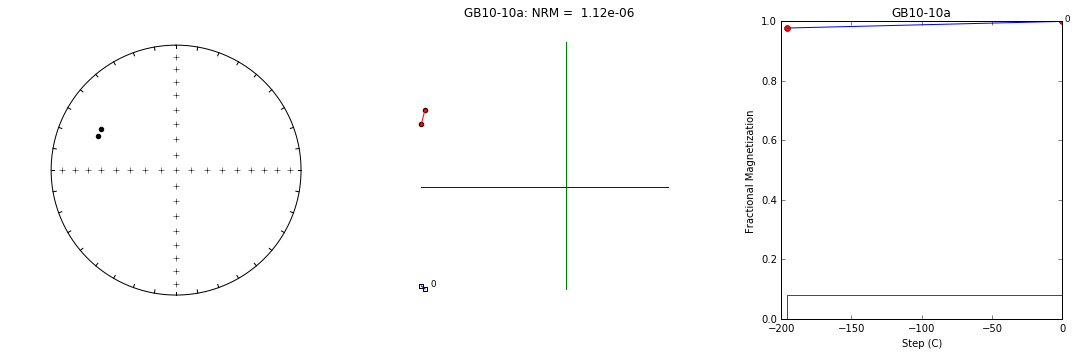

In [62]:
@interact(sample_num = samp_list, crd=['Core', 'Geographic', 'Tilt corrected'])
def plot_equal_area(sample_num = most_recent_samp_num, crd='Geographic'):
    sample = str(sample_num)
    if '-' in str(magic_measurements['er_specimen_name'][0]):
        sample_name = magic_measurements.er_site_name.unique()[0]+'-'+sample
    elif '.' in str(magic_measurements['er_specimen_name'][0]):
        sample_name = magic_measurements.er_site_name.unique()[0]+'.'+sample
    specimen_name = sample_name + 'a'
    tr = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['treatment_temp'].tolist()
    dec = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['measurement_dec'].tolist()
    inc = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['measurement_inc'].tolist()
    moment = magic_measurements.ix[magic_measurements.er_specimen_name==specimen_name]['measurement_magn_moment'].tolist()

    sample_info = er_samples.ix[er_samples['er_sample_name']==sample_name]
    sample_info.reset_index(inplace=True, drop=True)
    dec_geo, inc_geo = [], []
    dec_tc, inc_tc = [], []
    for n in range(len(dec)):
        d, i = pmag.dogeo(dec[n], inc[n], sample_info.sample_azimuth[0], sample_info.sample_dip[0])
        dec_geo.append(d)
        inc_geo.append(i)
    for n in range(len(dec_geo)):
        d, i = pmag.dotilt(dec_geo[n], inc_geo[n], sample_info.sample_bed_dip_direction[0], sample_info.sample_bed_dip[0])
        dec_tc.append(d)
        inc_tc.append(i)

    
    fig = plt.figure(figsize=(15,5))
    ax1 = plt.subplot2grid((1,3), (0,0), colspan=1)
    plt.axis("off")
    plot_net()

    if crd=='Core':
        datablock = map(list, zip(tr, dec, inc, moment))
        ipmag.plot_di(dec,inc)
    elif crd=='Geographic':
        datablock = map(list, zip(tr, dec_geo, inc_geo, moment))
        ipmag.plot_di(dec_geo, inc_geo)
    elif crd=='Tilt corrected':
        datablock = map(list, zip(tr, dec_tc, inc_tc, moment))
        ipmag.plot_di(dec_tc, inc_tc)

    ax2 = plt.subplot2grid((1,3), (0,1), colspan=1)
    plt.axis("off")
    plotZ(datablock, 90, specimen_name, 0)

    ax3 = plt.subplot2grid((1,3), (0,2), colspan=1)
    plt.axis("on")
    plotMT(datablock,specimen_name, 1, 'K',1)
    
    plt.tight_layout()
    plt.show()